In [21]:
import requests
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()
import pandas as pd
from datetime import datetime
from get_data import get_complet_table
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/isabelsearleriesgo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
def global_happiness():
    url = "http://127.0.0.1:5000/table/messages"
    text = requests.get(url)
    to_analize = [i['message_content'] for i in text.json()]
    sentiment=[sia.polarity_scores(i) for i in to_analize]
    pos=0
    neg=0
    for i in sentiment:
        pos+=i['pos']
        neg+=i['neg']
    mean_pos=pos/(len(sentiment))
    mean_neg=neg/(len(sentiment))
    if mean_pos < mean_neg:
        return print("Your employees are unhappy 😔")
    else:
        return print("Your employees are happy! 😃")

In [6]:
global_happiness()

Your employees are happy! 😃


In [7]:
def happiness_by_dept(dept):
    messages = requests.get("http://127.0.0.1:5000/table/messages")
    users = requests.get("http://127.0.0.1:5000/table/users")
    df_messages=pd.DataFrame(messages.json())
    df_users=pd.DataFrame(users.json())
    df_merged=df_users.merge(df_messages)
    df_merged['date_time'] = [i['$date']/1000 for i in df_merged['date_time']]
    df_merged['date_time'] = df_merged['date_time'].map(lambda x: datetime.fromtimestamp(x).strftime("%d/%m/%Y, %H:%M:%S")) 
    to_analize=list(df_merged[df_merged['department']==dept]['message_content'])
    sentiment=[sia.polarity_scores(i) for i in to_analize]
    pos=0
    neg=0
    for i in sentiment:
        pos+=i['pos']
        neg+=i['neg']
    mean_pos=pos/(len(sentiment))
    mean_neg=neg/(len(sentiment))
    if mean_pos < mean_neg:
        return print("Your team is unhappy 😔")
    else:
        return print("Your team is happy! 😃")

In [8]:
happiness_by_dept('Marketing')

Your team is unhappy 😔


In [15]:
df=get_complet_table()
df.head(4)

,idusers,name,lastname,department,idmessages,message_content,date_time
0,1,Pepe,Ruiz,IT,1,holaquetal,"28/11/2020, 20:29:56"
1,1,Pepe,Ruiz,IT,2,holaquetal,"28/11/2020, 20:29:58"
2,1,Pepe,Ruiz,IT,3,holaquetal,"28/11/2020, 20:32:13"
3,2,jose,Ruiz,IT,4,testing from jupyter,"29/11/2020, 15:23:36"


In [16]:
df['department'].unique()

array(['IT', 'BI', 'Quality', 'Operations', 'Finances', 'Marketing'],
      dtype=object)

In [18]:
IT=list(df[df['department']=='IT']['message_content'])
BI=list(df[df['department']=='BI']['message_content'])
Quality=list(df[df['department']=='Quality']['message_content'])
Operations=list(df[df['department']=='Operations']['message_content'])
Finances=list(df[df['department']=='Finances']['message_content'])
Marketing=list(df[df['department']=='Marketing']['message_content'])

In [71]:
sent_IT=[sia.polarity_scores(i) for i in IT]
sent_BI=[sia.polarity_scores(i) for i in BI]
sent_Q=[sia.polarity_scores(i) for i in Quality]
sent_Op=[sia.polarity_scores(i) for i in Operations]
sent_Fi=[sia.polarity_scores(i) for i in Finances]
sent_Mk=[sia.polarity_scores(i) for i in Marketing]

In [69]:
def pie_hapiness(sent):
    df=pd.DataFrame.from_dict(sent)
    negative=df['neg'].mean()
    positive=df['pos'].mean()
    neutral=df['neu'].mean()
    labels = ['Negative', 'Positive', 'Neutral']
    values = [negative, positive, neutral]
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.1f%%',
            shadow=True)
    plt.show()

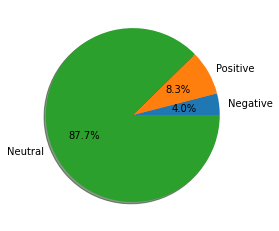

In [78]:
pie_hapiness(sent_IT)

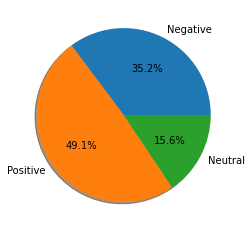

In [73]:
pie_hapiness(sent_Q)

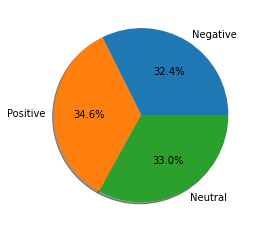

In [74]:
pie_hapiness(sent_Op)

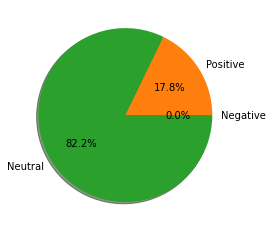

In [75]:
pie_hapiness(sent_Fi)

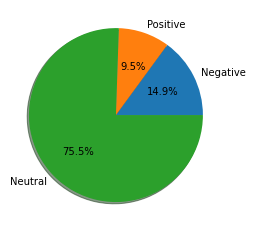

In [81]:
pie_hapiness(sent_BI)

<ipython-input-69-d9e2653f231b>:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(values, labels=labels, autopct='%1.1f%%',


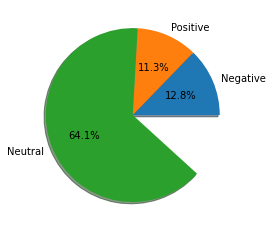

In [80]:
pie_hapiness(sent_Mk)